In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. 删除重复数据，并输出去重前后的数据量
raw_data = pd.read_csv('github_bot_raw_data.csv')
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]
print("去重前的数据量:", data.shape)
data = data.drop_duplicates()
print("去重后的数据量:", data.shape)



去重前的数据量: (20358, 34)
去重后的数据量: (19779, 34)


In [14]:
#2. 缺失值处理

data = data.drop(columns=['gravatar_id'])

print("各列缺失值情况：\n", data.isnull().sum())

text_columns = ['name', 'company', 'blog', 'location', 'email', 'bio', 'twitter_username']
data[text_columns] = data[text_columns].fillna("")

bool_columns = ['site_admin', 'hireable']
for col in bool_columns:
    data[col] = data[col].fillna(False).astype(bool)

print("处理后的缺失值情况：\n", data.isnull().sum())

各列缺失值情况：
 actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
处理后的缺失值情况：
 actor_id

C:\Users\TANG\AppData\Local\Temp\ipykernel_25292\2159378659.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(False).astype(bool)


In [15]:
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data['updated_at'] = pd.to_datetime(data['updated_at'], errors='coerce')

print("时间戳转换完成。")

时间戳转换完成。


C:\Users\TANG\AppData\Local\Temp\ipykernel_25292\1993308699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette='coolwarm')


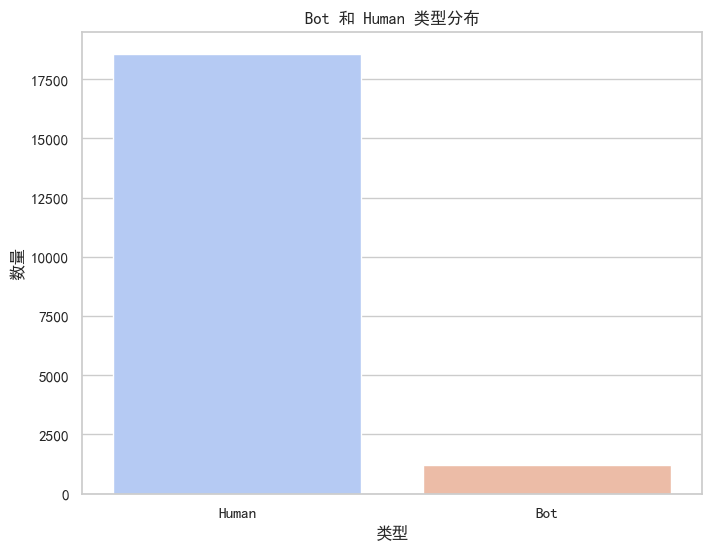

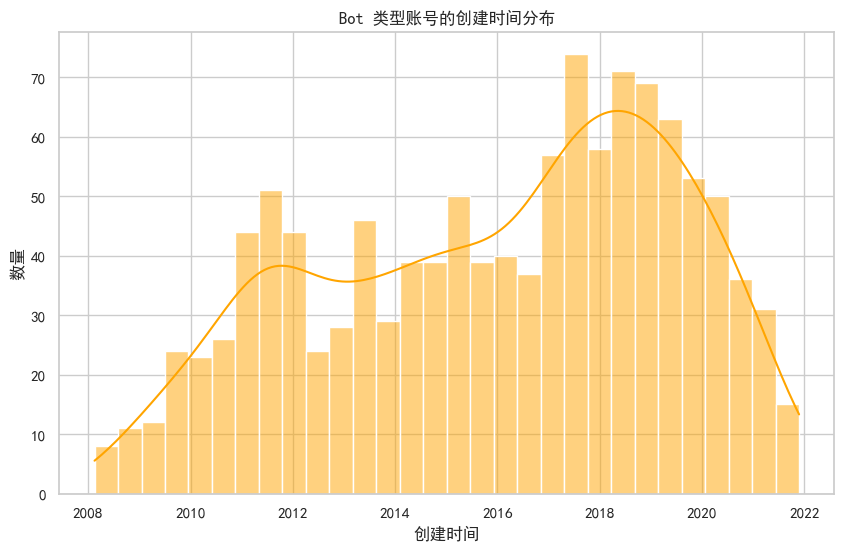

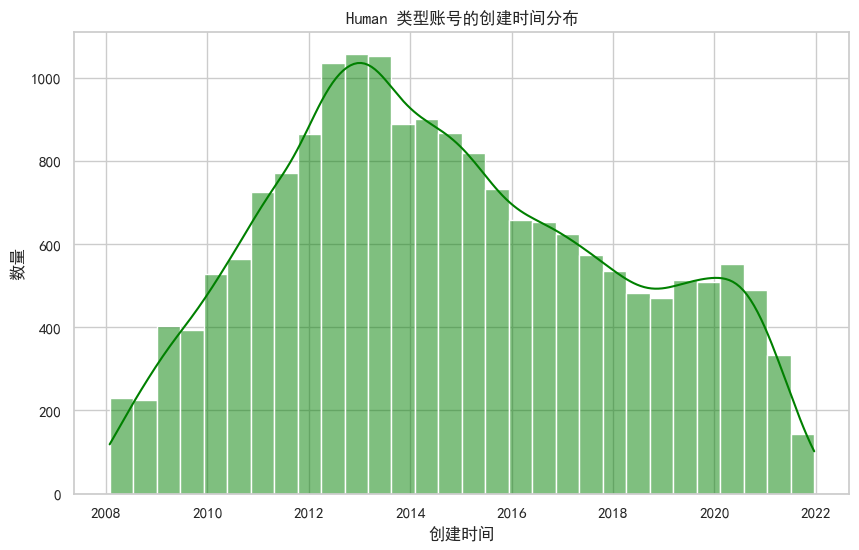

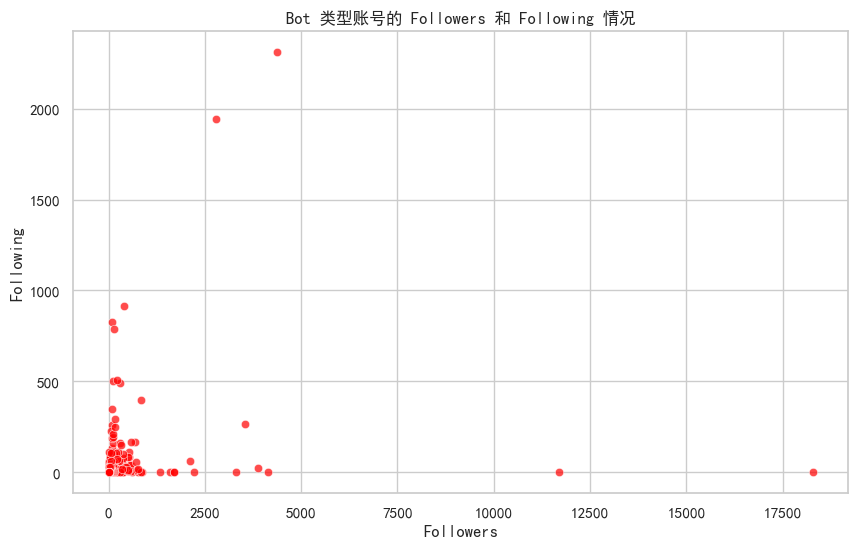

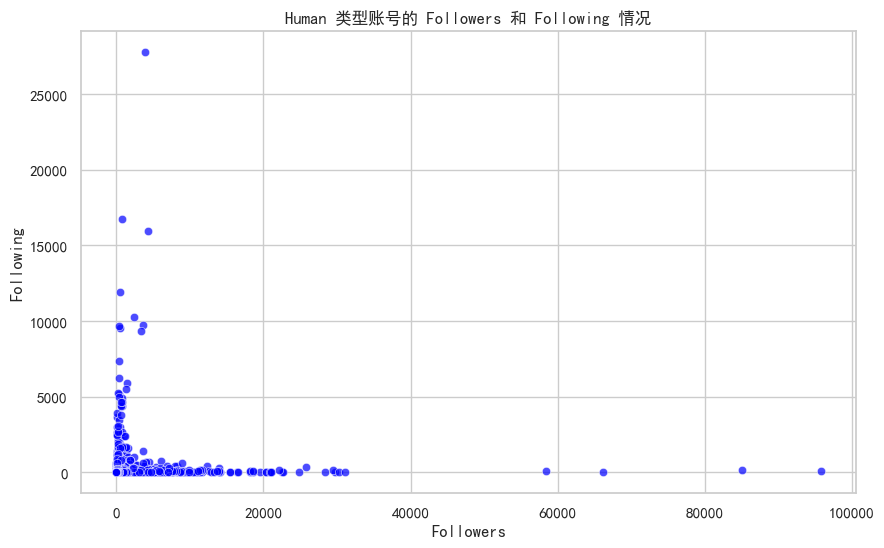

In [17]:
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams.update({'font.size': 20})

# 4.1 可视化 bot 和 human 类型的情况
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label', palette='coolwarm')
plt.title("Bot 和 Human 类型分布")
plt.xlabel("类型")
plt.ylabel("数量")
plt.show()

# 4.2 可视化 bot 类型账号的 created_at 情况
bot_data = data[data['label'] == 'Bot']
plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'].dropna(), bins=30, kde=True, color='orange')
plt.title("Bot 类型账号的创建时间分布")
plt.xlabel("创建时间")
plt.ylabel("数量")
plt.show()

# 4.3 可视化 human 类型账号的 created_at 情况
human_data = data[data['label'] == 'Human']
plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'].dropna(), bins=30, kde=True, color='green')
plt.title("Human 类型账号的创建时间分布")
plt.xlabel("创建时间")
plt.ylabel("数量")
plt.show()

# 4.4 可视化 bot 类型账号的 followers 和 following 情况
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bot_data, x='followers', y='following', alpha=0.7, color='red')
plt.title("Bot 类型账号的 Followers 和 Following 情况")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()

# 4.5 可视化 human 类型账号的 followers 和 following 情况
plt.figure(figsize=(10, 6))
sns.scatterplot(data=human_data, x='followers', y='following', alpha=0.7, color='blue')
plt.title("Human 类型账号的 Followers 和 Following 情况")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()